In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
xlsx = pd.read_excel('data/online_retail.xlsx')
xlsx.to_csv('data/online_retail.csv', encoding='utf-8', index=False)
df = pd.read_csv('data/online_retail.csv')

In [4]:
df.dropna(inplace=True)

In [5]:
df.drop_duplicates(inplace = True)

## Tratando textos do *dataset*

In [6]:
df.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [8]:
np_description = df['Description'].unique()
i = 0
for i in range(df['Description'].unique().size):
    df.replace(np_description[i],float(i),inplace = True)


In [9]:
np_description = df['Country'].unique()
i = 0
for i in range(df['Country'].unique().size):
    df.replace(np_description[i],float(i),inplace = True)


In [10]:
np_description = df['StockCode'].unique()
i = 0
for i in range(df['StockCode'].unique().size):
    df.replace(np_description[i],float(i),inplace = True)


In [11]:
df.head()

InvoiceNo  StockCode  Description  Quantity          InvoiceDate  UnitPrice  \
0    536365        0.0          0.0         6  2010-12-01 08:26:00       2.55   
1    536365        1.0          1.0         6  2010-12-01 08:26:00       3.39   
2    536365        2.0          2.0         8  2010-12-01 08:26:00       2.75   
3    536365        3.0          3.0         6  2010-12-01 08:26:00       3.39   
4    536365        4.0          4.0         6  2010-12-01 08:26:00       3.39   

   CustomerID  Country  
0     17850.0      0.0  
1     17850.0      0.0  
2     17850.0      0.0  
3     17850.0      0.0  
4     17850.0      0.0

Removendo o número e data do pedido.

In [12]:
df = df.drop(['InvoiceNo','InvoiceDate'], axis=1)
df.head()

StockCode  Description  Quantity  UnitPrice  CustomerID  Country
0        0.0          0.0         6       2.55     17850.0      0.0
1        1.0          1.0         6       3.39     17850.0      0.0
2        2.0          2.0         8       2.75     17850.0      0.0
3        3.0          3.0         6       3.39     17850.0      0.0
4        4.0          4.0         6       3.39     17850.0      0.0

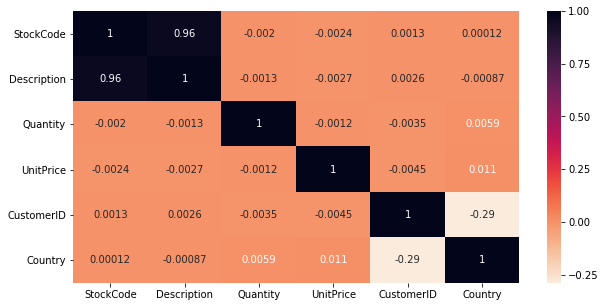

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,cmap=sns.cm.rocket_r)

Remove a tabela **StockCode** pois existe muita relção com a tabela **Descrição**.

In [14]:
df = df.drop(['StockCode'], axis=1)


In [15]:
df.head()

Description  Quantity  UnitPrice  CustomerID  Country
0          0.0         6       2.55     17850.0      0.0
1          1.0         6       3.39     17850.0      0.0
2          2.0         8       2.75     17850.0      0.0
3          3.0         6       3.39     17850.0      0.0
4          4.0         6       3.39     17850.0      0.0

## [Mean Shift](http://scikit-learn.org/stable/modules/clustering.html#mean-shift)

Clusterização em MeanShift visa descobrir bolhas em uma densidade suave de amostras. É um algoritmo que funciona através da atualização de candidatos para centroids para ser a média dos pontos dentro da região.

Dado um candidato centróide **x_i** para iteração **t** em que **m** é a média, o candidato é atualizado de acordo com a seguinte equação:

![fórmula](http://scikit-learn.org/stable/_images/math/df67cad6c90923bd6d5dd1ba1cc98b73ba772bd8.png)

**Hiperparâmetros**:
O algoritmo define automaticamente o número de clusters, em vez de depender de um parâmetro de `bandwidth`, que determina o tamanho da região para pesquisar. Esse parâmetro pode ser definido manualmente, mas pode ser estimado usando a função `estimate_bandwidth` fornecida, que é chamada se a largura de banda não estiver definida.
`quantile` é um valor entre **0.1** e **0.5** e significa que a mediana de todas as distâncias em pares que usada.

![grafico](http://scikit-learn.org/stable/_images/sphx_glr_plot_mean_shift_001.png)

In [88]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

In [102]:
bandwidth = estimate_bandwidth(df, quantile=0.2, n_samples=30000, n_jobs=4)

In [103]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [104]:
ms.fit(df)

MeanShift(bandwidth=1446.9810267716234, bin_seeding=True, cluster_all=True,
     min_bin_freq=1, n_jobs=1, seeds=None)

In [105]:
labels = ms.labels_

In [106]:
cluster_centers = ms.cluster_centers_

In [107]:
labels_unique = np.unique(labels)

In [108]:
n_clusters_ = len(labels_unique)

In [109]:
print("Número de clusters estimados : %d" % n_clusters_)

Número de clusters estimados : 18


### Visualização do resultado

**Descrição** relacionada com **quantidade**.

In [64]:
X = df.drop(['CustomerID', 'UnitPrice', 'Country'], axis=1)

In [65]:
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print("Número de clusters estimados : %d" % n_clusters_)

Número de clusters estimados : 29


In [66]:
x = np.array(X, ndmin=2)

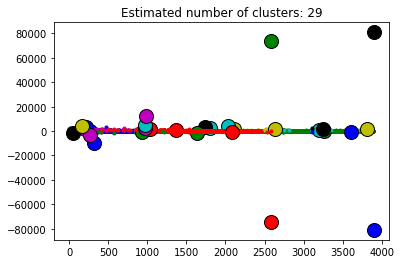

In [67]:
import matplotlib.pyplot as plt
from itertools import cycle

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(x[my_members, 0], x[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

É possível notar que a loja possui a maior parte dos seus pedidos com poucas quantidades.